<a href="https://colab.research.google.com/github/AkM-2018/DanceIdentification/blob/main/danceIdentificationv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

v1 uses the basic methods(without transfer learning). Just training on the training set and adjusting the hyperparameters

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import io
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip -uq "/content/drive/My Drive/train.zip" -d "/content/drive/My Drive/dataset"

In [ ]:
images_path = '/content/drive/My Drive/dataset/'

In [ ]:
train_dir = os.path.join(images_path, 'train')
train_kuchipudi_dir = os.path.join(train_dir, 'kuchipudi')
train_manipuri_dir = os.path.join(train_dir, 'manipuri')
train_mohiniyattam_dir = os.path.join(train_dir, 'mohiniyattam')
train_odissi_dir = os.path.join(train_dir, 'odissi')
train_sattriya_dir = os.path.join(train_dir, 'sattriya')
train_bharatanatyam_dir = os.path.join(train_dir, 'bharatanatyam')
train_kathak_dir = os.path.join(train_dir, 'kathak')
train_kathakali_dir = os.path.join(train_dir, 'kathakali')

val_dir = os.path.join(images_path, 'validation')
val_kuchipudi_dir = os.path.join(val_dir, 'kuchipudi')
val_manipuri_dir = os.path.join(val_dir, 'manipuri')
val_mohiniyattam_dir = os.path.join(val_dir, 'mohiniyattam')
val_odissi_dir = os.path.join(val_dir, 'odissi')
val_sattriya_dir = os.path.join(val_dir, 'sattriya')
val_bharatanatyam_dir = os.path.join(val_dir, 'bharatanatyam')
val_kathak_dir = os.path.join(val_dir, 'kathak')
val_kathakali_dir = os.path.join(val_dir, 'kathakali')

In [ ]:
batch_size = 8
epochs = 15
img_h = 150
img_w = 150
output_classes = 8

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   #rotation_range = 10,
                                   #width_shift_range = 0.3,
                                   #height_shift_range = 0.3,
                                   #horizontal_flip = True,
                                   #fill_mode='nearest'
                                   )

val_datagen = ImageDataGenerator(rescale = 1./255,
                                   #rotation_range = 10,
                                   #width_shift_range = 0.3,
                                   #height_shift_range = 0.3,
                                   #horizontal_flip = True,
                                   #fill_mode='nearest'
                                   )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_h,img_w),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    shuffle = True)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                    target_size=(img_h,img_w),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    )

Found 298 images belonging to 8 classes.
Found 66 images belonging to 8 classes.


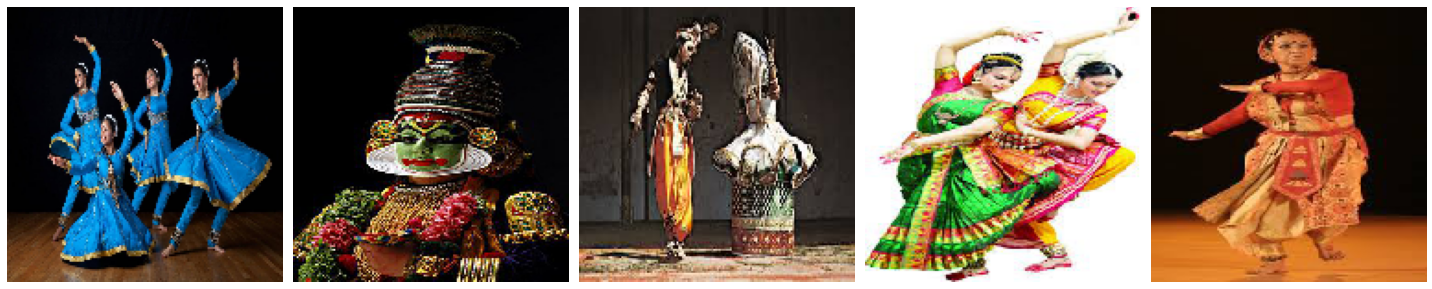

In [ ]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
model = Sequential([
                    Flatten(input_shape=(img_h,img_w,3)),
                    Dense(64,activation='relu'),
                    Dense(32,activation='relu'),
                    Dense(output_classes,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 67500)             0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4320064   
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 8)                 264       
Total params: 4,322,408
Trainable params: 4,322,408
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=298 // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=66 // batch_size
)

Epoch 1/15
37/37 [==============================] - 4s 109ms/step - loss: 3.3533 - accuracy: 0.1517 - val_loss: 1.8882 - val_accuracy: 0.2031
Epoch 2/15
37/37 [==============================] - 4s 110ms/step - loss: 2.3376 - accuracy: 0.2276 - val_loss: 1.6612 - val_accuracy: 0.1897
Epoch 3/15
37/37 [==============================] - 4s 109ms/step - loss: 2.2422 - accuracy: 0.1931 - val_loss: 2.0996 - val_accuracy: 0.2069
Epoch 4/15
37/37 [==============================] - 4s 108ms/step - loss: 1.8483 - accuracy: 0.2862 - val_loss: 2.2716 - val_accuracy: 0.1552
Epoch 5/15
37/37 [==============================] - 4s 108ms/step - loss: 1.8384 - accuracy: 0.2897 - val_loss: 2.0528 - val_accuracy: 0.1897
Epoch 6/15
37/37 [==============================] - 4s 100ms/step - loss: 1.6384 - accuracy: 0.3414 - val_loss: 2.1417 - val_accuracy: 0.1897
Epoch 7/15
37/37 [==============================] - 4s 105ms/step - loss: 1.4728 - accuracy: 0.4207 - val_loss: 1.7552 - val_accuracy: 0.3276
Epoch 

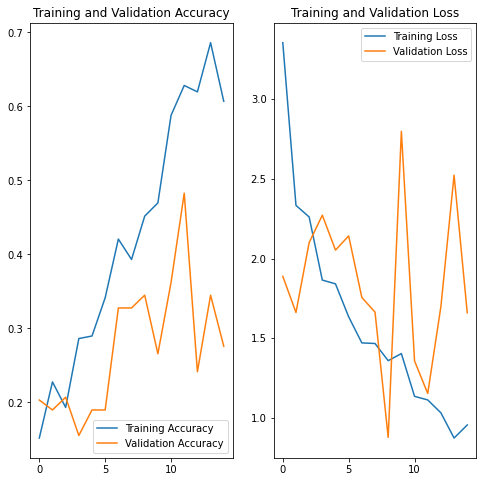

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
probability_model = model

In [ ]:
test_path = os.path.join(images_path, 'test')

test_datagen = ImageDataGenerator(rescale = 1./255,
                                   #rotation_range = 10,
                                   #width_shift_range = 0.3,
                                   #height_shift_range = 0.3,
                                   #horizontal_flip = True,
                                   #fill_mode='nearest'
                                   )

test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(img_h,img_w),
                                                    batch_size = batch_size,
                                                    class_mode = 'categorical',
                                                    )

Found 156 images belonging to 1 classes.


In [ ]:
prediction = probability_model.predict(test_generator)

In [ ]:
print(np.argmax(prediction[53,:]))
print(np.argmax(prediction[54,:]))
print(np.argmax(prediction[52,:]))
print(np.argmax(prediction[55,:]))
print(np.argmax(prediction[56,:]))

6
1
2
5
0


In [ ]:
i = 0
sum = 0
for i in range(155):
  pred = prediction[i,:]
  pred = np.argmax(pred)

new = (pred==test_data['ans'])
print(np.sum(new)/154*100)
print(new)

5.194805194805195
0      False
1      False
2      False
3      False
4      False
       ...  
151    False
152    False
153    False
154    False
155    False
Name: ans, Length: 156, dtype: bool


In [ ]:
for i in prediction:
  pred = prediction[i,:]
  pred = np.argmax(pred)


In [ ]:
train_data = pd.read_csv('train.csv', header=None)
test_data = pd.read_csv('test - Copy.csv', header=None)
train_data = train_data.iloc[1:]
train_data.columns = ['imageName', 'y']
test_data.columns = ['imageName','y','ans']

In [ ]:
train_data['yCate'] = pd.Categorical(train_data.y)
train_data['yCate'] = pd.Categorical(train_data['yCate'])
train_data['yCate'] = train_data.yCate.cat.codes
train_data['imageNo'] = train_data['imageName'].str.replace(r'.jpg$', '')
train_data['imageNo'] = train_data['imageNo'].astype(int)
print(train_data.sort_values('imageNo'))

    imageName       y  yCate  imageNo
255     1.jpg  kathak      1        1
36      2.jpg  kathak      1        2
106     3.jpg  kathak      1        3
60      4.jpg  kathak      1        4
356     5.jpg  kathak      1        5
..        ...     ...    ...      ...
154   512.jpg  odissi      6      512
93    513.jpg  odissi      6      513
325   515.jpg  odissi      6      515
91    516.jpg  odissi      6      516
141   519.jpg  odissi      6      519

[364 rows x 4 columns]


In [ ]:
train_data.head()

,imageName,y,yCate,imageNo
1,96.jpg,manipuri,4,96
2,163.jpg,bharatanatyam,0,163
3,450.jpg,odissi,6,450
4,219.jpg,kathakali,2,219
5,455.jpg,odissi,6,455


In [ ]:
train_data.dtypes

imageName    object
y            object
yCate          int8
imageNo       int64
dtype: object